Satellite Orbit Prediction

## Exploratory Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)
#warnings.filterwarnings("ignore", category=DataConversionWarning)

#from warnings import simplefilter
#from sklearn.exceptions import ConvergenceWarning
#simplefilter("ignore", category=ConvergenceWarning)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/AI_Project/dataset/'

In [4]:
df_train = pd.read_csv(data_dir+'jan_train.csv')
dummy = df_train
dummy.head()

,id,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
0,0,2014-01-01 00:00:00.000,0,-8855.823863,13117.780146,-20728.353233,-0.908303,-3.808436,-2.022083,-8843.131454,13138.221690,-20741.615306,-0.907527,-3.804930,-2.024133
1,1,2014-01-01 00:46:43.000,0,-10567.672384,1619.746066,-24451.813271,-0.302590,-4.272617,-0.612796,-10555.500066,1649.289367,-24473.089556,-0.303704,-4.269816,-0.616468
2,2,2014-01-01 01:33:26.001,0,-10578.684043,-10180.467460,-24238.280949,0.277435,-4.047522,0.723155,-10571.858472,-10145.939908,-24271.169776,0.274880,-4.046788,0.718768
3,3,2014-01-01 02:20:09.001,0,-9148.251857,-20651.437460,-20720.381279,0.715600,-3.373762,1.722115,-9149.620794,-20618.200201,-20765.019094,0.712437,-3.375202,1.718306
4,4,2014-01-01 03:06:52.002,0,-6719.092336,-28929.061629,-14938.907967,0.992507,-2.519732,2.344703,-6729.358857,-28902.271436,-14992.399986,0.989382,-2.522618,2.342237


In [5]:
print(df_train.shape)

(503227, 15)


In [6]:
df_trunc = df_train.sample(n=20000, random_state=1)

In [7]:
print(df_trunc.shape)

(20000, 15)


In [8]:
df_trunc.columns

Index(['id', 'epoch', 'sat_id', 'x', 'y', 'z', 'Vx', 'Vy', 'Vz', 'x_sim',
       'y_sim', 'z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'],
      dtype='object')

# Step 1: Look at the missing values

In [9]:
df_trunc.isnull().sum()

id        0
epoch     0
sat_id    0
x         0
y         0
z         0
Vx        0
Vy        0
Vz        0
x_sim     0
y_sim     0
z_sim     0
Vx_sim    0
Vy_sim    0
Vz_sim    0
dtype: int64

In [10]:
df_trunc.values

array([[269642, '2014-01-05 12:00:17.949', 144, ..., 1.3614517457783863,
        1.22692672217135, 0.9294676882769088],
       [530556, '2014-01-16 10:08:34.944', 283, ..., 4.090031424553291,
        1.0104461815689625, -0.4827462945553],
       [345947, '2014-01-05 04:31:04.580', 186, ..., -1.7231524326800385,
        2.626068890765572, 6.483063863737942],
       ...,
       [937245, '2014-01-15 10:47:38.281', 465, ..., -2.9123792751101423,
        -0.8842166846055773, -2.3226005760966624],
       [103776, '2014-01-04 08:04:14.107', 53, ..., 0.4420655787303197,
        -6.028421067710471, -1.8336291538654297],
       [520516, '2014-01-20 18:33:20.078', 276, ..., -2.3613514036261853,
        -2.8762500318265096, -3.8559174868966095]], dtype=object)

## Steps 2 and 3. Remove or Imput the missing values

In [11]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)



X_transition = pd.DataFrame(df_trunc)
X_clean = DataFrameImputer().fit_transform(X_transition)

X_clean.isnull().sum()

id        0
epoch     0
sat_id    0
x         0
y         0
z         0
Vx        0
Vy        0
Vz        0
x_sim     0
y_sim     0
z_sim     0
Vx_sim    0
Vy_sim    0
Vz_sim    0
dtype: int64

In [12]:
X_clean.head()

,id,epoch,sat_id,x,y,z,Vx,Vy,Vz,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
109886,269642,2014-01-05 12:00:17.949,144,30126.921553,-53535.832209,-17348.622794,1.364685,1.234672,0.932839,30052.097747,-53754.197860,-17450.046740,1.361452,1.226927,0.929468
216944,530556,2014-01-16 10:08:34.944,283,-2048.437488,7080.611144,17204.450326,4.087319,1.469615,0.543840,2120.411033,8337.427534,17219.883526,4.090031,1.010446,-0.482746
141401,345947,2014-01-05 04:31:04.580,186,-6587.192603,-5804.320581,-424.768490,-1.718357,2.630512,6.484688,-6584.530435,-5809.654327,-440.545665,-1.723152,2.626069,6.483064
462837,1132688,2014-01-19 02:19:30.694,553,2188.175101,6829.491559,7918.525007,-5.910188,-1.458102,2.476652,-4483.920930,3887.471443,8893.060281,-5.466481,-3.548476,-0.801769
314037,768706,2014-01-23 13:57:33.336,379,7671.688412,17699.356758,12036.072793,-1.489765,3.200270,-1.514596,9158.077370,14272.551015,13623.290094,-1.158834,3.734703,-1.028717


In [13]:
X_clean.columns

Index(['id', 'epoch', 'sat_id', 'x', 'y', 'z', 'Vx', 'Vy', 'Vz', 'x_sim',
       'y_sim', 'z_sim', 'Vx_sim', 'Vy_sim', 'Vz_sim'],
      dtype='object')

In [14]:
X_clean = X_clean.drop(['id','epoch','x','y','z','Vx','Vy','Vz'], axis=1)  # REMOVE THE TARGET VARIABLE

We can see that the numerical values do not have the same scale. We will need to apply scaling to the test set that we computed for the training set.

## Step 4. Handle Categorical Data, for simplicity let's just One Hat Encode all the categorical values

In [15]:
XX=pd.get_dummies(X_clean)

In [16]:
XX.head()

,sat_id,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
109886,144,30052.097747,-53754.197860,-17450.046740,1.361452,1.226927,0.929468
216944,283,2120.411033,8337.427534,17219.883526,4.090031,1.010446,-0.482746
141401,186,-6584.530435,-5809.654327,-440.545665,-1.723152,2.626069,6.483064
462837,553,-4483.920930,3887.471443,8893.060281,-5.466481,-3.548476,-0.801769
314037,379,9158.077370,14272.551015,13623.290094,-1.158834,3.734703,-1.028717


In [17]:
X_clean.shape

(20000, 7)

In [18]:
XX.shape

(20000, 7)

In [19]:
X_clean_column_names =X_clean.columns

# Step 5: Apply Scaler

In [20]:
from sklearn.preprocessing import MinMaxScaler
sscaler = MinMaxScaler()

#X_clean = X_clean.drop(['id','epoch'], axis=1)

XX = sscaler.fit_transform(X_clean.astype(np.float)) #You will lose the column names

In [21]:
XX

array([[0.24040067, 0.61486256, 0.47116485, ..., 0.61219894, 0.58598756,
        0.52247118],
       [0.47245409, 0.55039471, 0.60124799, ..., 0.78654098, 0.57266058,
        0.43504188],
       [0.31051753, 0.53030324, 0.57160958, ..., 0.41510879, 0.67212159,
        0.86629093],
       ...,
       [0.77629382, 0.50867993, 0.54701106, ..., 0.33912338, 0.45602128,
        0.32113763],
       [0.0884808 , 0.51980252, 0.58640138, ..., 0.55345495, 0.13933361,
        0.35140955],
       [0.46076795, 0.53483234, 0.61231538, ..., 0.37433119, 0.33338766,
        0.22621092]])

In [22]:
XX_df = pd.DataFrame(data = XX,columns = X_clean.columns) # Return the column names
XX_df.head()

,sat_id,x_sim,y_sim,z_sim,Vx_sim,Vy_sim,Vz_sim
0,0.240401,0.614863,0.471165,0.424441,0.612199,0.585988,0.522471
1,0.472454,0.550395,0.601248,0.516938,0.786541,0.572661,0.435042
2,0.310518,0.530303,0.571610,0.469821,0.415109,0.672122,0.866291
3,0.923205,0.535152,0.591925,0.494723,0.175930,0.292004,0.415291
4,0.632721,0.566638,0.613682,0.507342,0.451166,0.740371,0.401241


# Step 6:  Now let's run an automated Machine Learning to the above processed data

Below we combine the notebook codes previously shared into a single running code to create an **Automated ML**

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import pylab as plot
import numpy as np

Number_trials=10

def train_knn(X, y):
    score_train = []
    score_test = []

    for seed in range(Number_trials):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        neighbors_settings = range(1,20)
        acc_train = []
        acc_test = []

        for n_neighbors in neighbors_settings:   
            reg = KNeighborsRegressor(n_neighbors=n_neighbors) # build the model 
            reg.fit(X_train, y_train)    
            acc_train.append(reg.score(X_train, y_train))
            acc_test.append(reg.score(X_test, y_test))

        score_train.append(acc_train)
        score_test.append(acc_test)
        
    score = np.mean(score_test, axis=0)
    run_time = (time.time() - start_time)
    return ['kNN', np.amax(score), 'N_Neighbor = {0}'.format(np.argmax(score)+1), 'NA',run_time]

def train_linear(X, y):
    score_train = []
    score_test = []
    weighted_coefs = []

    for seedN in range(1,Number_trials,1):
            training_accuracy = []  
            test_accuracy = []
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seedN)
            lr = LinearRegression().fit(X_train, y_train)

            training_accuracy.append(lr.score(X_train, y_train))
            test_accuracy.append(lr.score(X_test, y_test))

            coefs = lr.coef_
            weighted_coefs.append(coefs)
    
            score_train.append(training_accuracy)
            score_test.append(test_accuracy)
            

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs[0,:]))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(7,3))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Linear', np.amax(np.abs(score)), \
            'NA', top_predictor, run_time]

def train_lasso(X, y, reg):
    alpha_lasso = [1e-5, 1e-4, 1e-3, 7e-3, 1e-2, 5e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 10]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(1,Number_trials,1):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in alpha_lasso:
            lasso = Lasso(alpha=alpha_run,max_iter=1000000).fit(X_train, y_train)
            training_accuracy.append(lasso.score(X_train, y_train))
            test_accuracy.append(lasso.score(X_test, y_test))
      
            coefs = lasso.coef_
            weighted_coefs.append(coefs)

        score_train.append(training_accuracy)
        score_test.append(test_accuracy)

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs[0,:]))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(7,3))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])

    run_time = (time.time() - start_time)
    return ['Lasso', np.amax(np.abs(score)), \
            'a = {0}'.format(alpha_lasso[np.argmax(np.abs(lasso.coef_.T))]), top_predictor, run_time]

def train_ridge(X, y, reg):
    alpha_ridge = [1e-5, 1e-4, 1e-3, 7e-3, 1e-2, 5e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 10, 20]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in alpha_ridge:
            ridge = Ridge(alpha=alpha_run).fit(X_train, y_train)
            training_accuracy.append(ridge.score(X_train, y_train))
            test_accuracy.append(ridge.score(X_test, y_test))
      
            coefs = ridge.coef_
            weighted_coefs.append(coefs)
        
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs[0,:]))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(7,3))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])

    run_time = (time.time() - start_time)
    return ['Ridge', np.amax(np.abs(score)), \
            'a = {0}'.format(alpha_ridge[np.argmax(np.abs(ridge.coef_.T))]), top_predictor, run_time]

def train_svm(X, y, reg):
    C = [1e-8, 1e-4, 1e-3, 1e-2, 0.1, 0.2,0.4, 0.75, 1, 1.5, 3, 5, 10, 15,  20, 100, 300, 1000, 5000]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for alpha_run in C:
            if reg == 'l1':
                svr = LinearSVR(C=alpha_run, loss=reg, dual=False).fit(X_train, y_train)
            if reg == 'l2':
                svr = LinearSVR(C=alpha_run, loss=reg).fit(X_train, y_train)
            training_accuracy.append(svr.score(X_train, y_train))
            test_accuracy.append(svr.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = svr.coef_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs[0,:]))]
    abs_mean_coefs = np.abs(mean_coefs[0,:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(7,3))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Linear SVR', np.amax(score), \
            'C = {0}'.format(C[np.argmax(score)]), top_predictor,run_time]

def train_RF(X, y, reg):
    max_features_tuning=[0.1, .2, .3, .4, .5, .7, .8]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for max_features_run in max_features_tuning:
            svr = RandomForestRegressor(n_estimators=100, max_features=max_features_run).fit(X_train, y_train)
            training_accuracy.append(svr.score(X_train, y_train))
            test_accuracy.append(svr.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = svr.feature_importances_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 
    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)   

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(7,3))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Random Forest', np.amax(score), \
            'Max_features = {0}'.format(max_features_tuning[np.argmax(score)]), top_predictor,run_time]

def train_GBM(X, y, reg):
    max_features_tuning=[0.1, .2, .3, .4, .5, .7, .8]
    #C = [.01, .1]
    score_train = []
    score_test = []
    weighted_coefs=[]
    
    for seed in range(Number_trials):
        training_accuracy = []  
        test_accuracy = []
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
        for max_features_run in max_features_tuning:
            svc = GradientBoostingRegressor(n_estimators=1000, max_features=max_features_run).fit(X_train, y_train)
            training_accuracy.append(svc.score(X_train, y_train))
            test_accuracy.append(svc.score(X_test, y_test))
           # if alpha_run == 0.01:
            coefs = svc.feature_importances_
            weighted_coefs.append(coefs)
                
        score_train.append(training_accuracy)
        score_test.append(test_accuracy)
 

    mean_coefs=np.mean(weighted_coefs, axis=0) #get the mean of the weighted coefficients over all the trials       
    score = np.mean(score_test, axis=0)
    

    top_predictor=X.columns[np.argmax(np.abs(mean_coefs))]
    abs_mean_coefs = np.abs(mean_coefs[:])
    coefs_count = len(abs_mean_coefs)
    fig, ax = plt.subplots(figsize=(7,3))
    ax.barh(np.arange(coefs_count), sorted(abs_mean_coefs))
        
    ax.set_yticks(np.arange(coefs_count))
    ax.set_yticklabels(X.columns[np.argsort(abs_mean_coefs)])
    
    run_time = (time.time() - start_time)
    return ['Gradient Boosting Method', np.amax(score), \
            'Max_features = {0}'.format(max_features_tuning[np.argmax(score)]), top_predictor,run_time]


['kNN', 0.9205385042870777, 'N_Neighbor = 2', 'NA', 118.33820414543152]
118.33820414543152 seconds
['Linear', 0.9490395743888782, 'NA', 'x_sim', 0.3675699234008789]
0.3675699234008789 seconds
['Lasso', 0.949039574365318, 'a = 10', 'x_sim', 3.5581419467926025]
3.5581419467926025 seconds
['Ridge', 0.9486257815564578, 'a = 10', 'x_sim', 2.1010684967041016]
2.1010684967041016 seconds
['Random Forest', 0.9487639322031868, 'Max_features = 0.8', 'x_sim', 399.4899055957794]
399.4899055957794 seconds


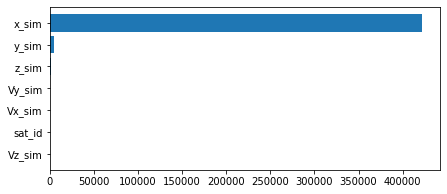

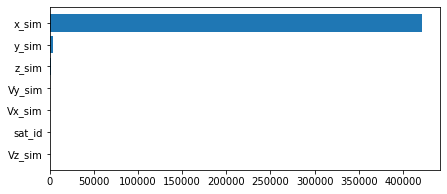

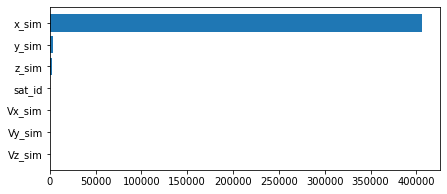

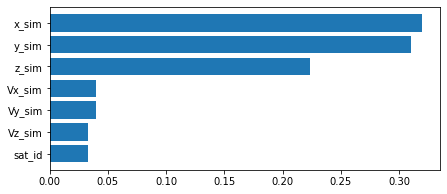

In [43]:
X = XX_df
y = df_trunc[['x','y','z','Vx','Vy','Vz']]

import time

start_time = time.time()
a = train_knn(X,y)
print(a)
print("%s seconds" % a[4])

start_time = time.time()
b = train_linear(X,y)
print(b)
print("%s seconds" % b[4])

start_time = time.time()
c = train_lasso(X,y,reg='none')
print(c)
print("%s seconds" % c[4])

start_time = time.time()
d = train_ridge(X,y,reg='none')
print(d)
print("%s seconds" % d[4])

#start_time = time.time()
#e = train_svm(X,y,reg='l2')
#print(e)
#print("%s seconds" % e[4])

#start_time = time.time()
#f = train_svm(X,y,reg='l1')
#print(f)
#print("%s seconds" % f[4])

start_time = time.time()
g = train_RF(X,y,reg='none')
print(g)
print("%s seconds" % g[4])

#start_time = time.time()
#h = train_GBM(X,y,reg='none')
#print(h)
#print("%s seconds" % h[4])

In [39]:
cols = ['Machine Learning Method', 'Test Accuracy', 'Best Parameter', 'Top Predictor Variable', 'Run Time']
df2 = pd.DataFrame(columns=cols)

df2.loc[0] = a
df2.loc[1] = b
df2.loc[2] = c
df2.loc[3] = d
#df2.loc[4] = e
#df2.loc[5] = f
df2.loc[6] = g
#df2.loc[7] = h

df2

,Machine Learning Method,Test Accuracy,Best Parameter,Top Predictor Variable,Run Time
0,kNN,0.920539,N_Neighbor = 2,NA,117.512821
1,Linear,0.949040,NA,x_sim,0.242777
2,Lasso,0.949040,a = 10,x_sim,3.548396
3,Ridge,0.948626,a = 10,x_sim,2.092442
6,Random Forest,0.948498,Max_features = 0.8,x_sim,398.639766
